### The IMDB dataset

**Loading the IMDB dataset**

In [1]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

17473536/17464789 [==============================] - 0s 0us/step


In [2]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [3]:
train_labels[0]

1

In [4]:
max([max(sequence) for sequence in train_data])

9999

**Decoding reviews back to text**

In [5]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])

1654784/1641221 [==============================] - 0s 0us/step


### Preparing the data

**Encoding the integer sequences via multi-hot encoding**

In [6]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [7]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [8]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

### Building your model

**Model definition**

In [12]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

**Compiling the model**

In [13]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

### Validating your approach

**Setting aside a validation set**

In [9]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

**Training your model**

In [14]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 1s 26ms/step - loss: 0.5265 - accuracy: 0.7837 - val_loss: 0.3998 - val_accuracy: 0.8713
Epoch 2/20
30/30 [==============================] - 1s 19ms/step - loss: 0.3218 - accuracy: 0.9021 - val_loss: 0.3147 - val_accuracy: 0.8889
Epoch 3/20
30/30 [==============================] - 1s 18ms/step - loss: 0.2373 - accuracy: 0.9257 - val_loss: 0.2939 - val_accuracy: 0.8858
Epoch 4/20
30/30 [==============================] - 1s 18ms/step - loss: 0.1875 - accuracy: 0.9425 - val_loss: 0.2738 - val_accuracy: 0.8888
Epoch 5/20
30/30 [==============================] - 1s 18ms/step - loss: 0.1539 - accuracy: 0.9521 - val_loss: 0.2757 - val_accuracy: 0.8862
Epoch 6/20
30/30 [==============================] - 1s 18ms/step - loss: 0.1270 - accuracy: 0.9625 - val_loss: 0.2855 - val_accuracy: 0.8862
Epoch 7/20
30/30 [==============================] - 1s 18ms/step - loss: 0.1069 - accuracy: 0.9682 - val_loss: 0.2958 - val_accuracy: 0.8857
Epoch 8/20
30

In [15]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

**Plotting the training and validation loss**

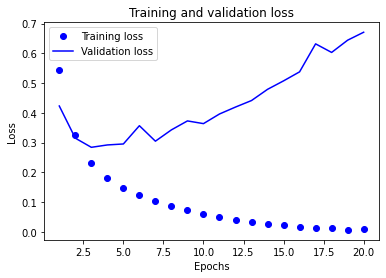

In [ ]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

**Plotting the training and validation accuracy**

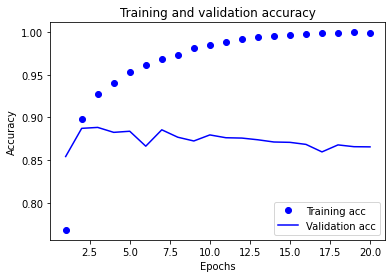

In [ ]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

**Retraining a model from scratch**

In [ ]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 2s 31ms/step - loss: 0.4628 - accuracy: 0.8158
Epoch 2/4
49/49 [==============================] - 1s 30ms/step - loss: 0.2655 - accuracy: 0.9110
Epoch 3/4
49/49 [==============================] - 1s 30ms/step - loss: 0.2047 - accuracy: 0.9265
Epoch 4/4
782/782 [==============================] - 2s 3ms/step - loss: 0.3201 - accuracy: 0.8741


In [ ]:
results

[0.320098876953125, 0.8740800023078918]

### Using a trained model to generate predictions on new data

In [ ]:
model.predict(x_test)

array([[0.13326192],
       [0.9988809 ],
       [0.634463  ],
       ...,
       [0.08197233],
       [0.03423634],
       [0.4878762 ]], dtype=float32)

### 1. Trying different number of hidden layers in the model to determine its effect on validation and test accuracy

**Model Definitions**

In [ ]:
model_1a = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model_1b = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

**Compiling the New Models**

In [ ]:
model_1a.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

model_1b.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

**Training the New Models**

In [ ]:
history_1a = model_1a.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

history_1b = model_1b.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 3s 62ms/step - loss: 0.5006 - accuracy: 0.7896 - val_loss: 0.3603 - val_accuracy: 0.8803
Epoch 2/20
30/30 [==============================] - 2s 58ms/step - loss: 0.2858 - accuracy: 0.9054 - val_loss: 0.3374 - val_accuracy: 0.8648
Epoch 3/20
30/30 [==============================] - 1s 41ms/step - loss: 0.2065 - accuracy: 0.9319 - val_loss: 0.3234 - val_accuracy: 0.8688
Epoch 4/20
30/30 [==============================] - 1s 39ms/step - loss: 0.1666 - accuracy: 0.9429 - val_loss: 0.3062 - val_accuracy: 0.8780
Epoch 5/20
30/30 [==============================] - 1s 41ms/step - loss: 0.1301 - accuracy: 0.9589 - val_loss: 0.2913 - val_accuracy: 0.8854
Epoch 6/20
30/30 [==============================] - 1s 40ms/step - loss: 0.1091 - accuracy: 0.9648 - val_loss: 0.3162 - val_accuracy: 0.8847
Epoch 7/20
30/30 [==============================] - 1s 39ms/step - loss: 0.0929 - accuracy: 0.9713 - val_loss: 0.3294 - val_accuracy: 0.8824
Epoch 8/20
30

**Looking at the effect of change in layers on the parameters**

In [ ]:
model_1a.summary()
model_1b.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 16)                160016    
                                                                 
 dense_7 (Dense)             (None, 16)                272       
                                                                 
 dense_8 (Dense)             (None, 16)                272       
                                                                 
 dense_9 (Dense)             (None, 1)                 17        
                                                                 
Total params: 160,577
Trainable params: 160,577
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)         

**Plotting the Training and Validation Losses**

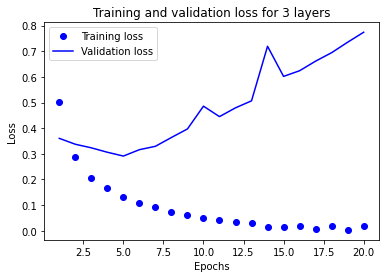

In [ ]:
import matplotlib.pyplot as plt
history_dict_1a = history_1a.history
loss_values_1a = history_dict_1a["loss"]
val_loss_values_1a = history_dict_1a["val_loss"]
epochs = range(1, len(loss_values_1a) + 1)
plt.plot(epochs, loss_values_1a, "bo", label="Training loss")
plt.plot(epochs, val_loss_values_1a, "b", label="Validation loss")
plt.title("Training and validation loss for 3 layers")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

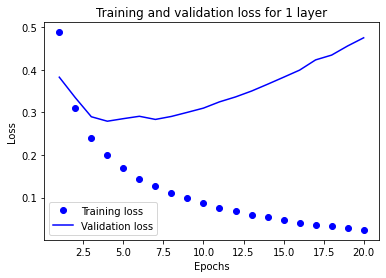

In [ ]:
import matplotlib.pyplot as plt
history_dict_1b = history_1b.history
loss_values_1b = history_dict_1b["loss"]
val_loss_values_1b = history_dict_1b["val_loss"]
epochs = range(1, len(loss_values_1b) + 1)
plt.plot(epochs, loss_values_1b, "bo", label="Training loss")
plt.plot(epochs, val_loss_values_1b, "b", label="Validation loss")
plt.title("Training and validation loss for 1 layer")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

**Plotting the training and validation accuracy**

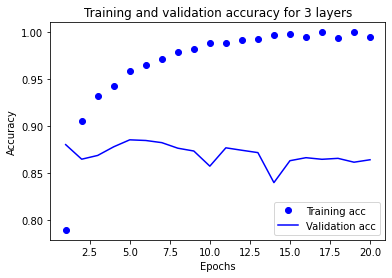

In [ ]:
plt.clf()
acc = history_dict_1a["accuracy"]
val_acc = history_dict_1a["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy for 3 layers")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

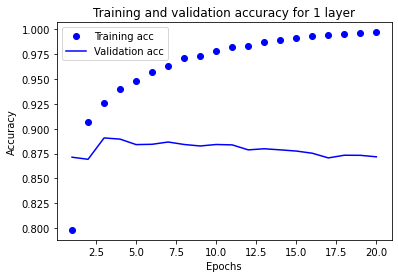

In [ ]:
plt.clf()
acc = history_dict_1b["accuracy"]
val_acc = history_dict_1b["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy for 1 layer")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

**Retraining the Models from Scratch**

In [ ]:
model_1a = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model_1a.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model_1a.fit(x_train, y_train, epochs=4, batch_size=512)
results_1a = model_1a.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 3s 28ms/step - loss: 0.4673 - accuracy: 0.8125
Epoch 2/4
49/49 [==============================] - 1s 27ms/step - loss: 0.2526 - accuracy: 0.9113
Epoch 3/4
49/49 [==============================] - 1s 28ms/step - loss: 0.1905 - accuracy: 0.9316
Epoch 4/4
782/782 [==============================] - 2s 3ms/step - loss: 0.3265 - accuracy: 0.8754


In [ ]:
results_1a

[0.3264565169811249, 0.8753600120544434]

In [ ]:
model_1b = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model_1b.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model_1b.fit(x_train, y_train, epochs=4, batch_size=512)
results_1b = model_1b.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 2s 30ms/step - loss: 0.4603 - accuracy: 0.8306
Epoch 2/4
49/49 [==============================] - 1s 30ms/step - loss: 0.2882 - accuracy: 0.9046
Epoch 3/4
49/49 [==============================] - 1s 29ms/step - loss: 0.2259 - accuracy: 0.9240
Epoch 4/4
782/782 [==============================] - 2s 2ms/step - loss: 0.2871 - accuracy: 0.8829


In [ ]:
results_1b

[0.2870545983314514, 0.8829200267791748]

### 2. Trying Hidden Layers with Different Number of Hidden Units

**Defining and Compiling the Model with 32 layers**

In [19]:
model_2a = keras.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model_2a.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_2a = model_2a.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))
history_dict_2a = history_2a.history
history_dict_2a.keys()

Epoch 1/20
30/30 [==============================] - 1s 30ms/step - loss: 0.5026 - accuracy: 0.7837 - val_loss: 0.3626 - val_accuracy: 0.8738
Epoch 2/20
30/30 [==============================] - 1s 23ms/step - loss: 0.2838 - accuracy: 0.9035 - val_loss: 0.2914 - val_accuracy: 0.8887
Epoch 3/20
30/30 [==============================] - 1s 23ms/step - loss: 0.2043 - accuracy: 0.9304 - val_loss: 0.2811 - val_accuracy: 0.8876
Epoch 4/20
30/30 [==============================] - 1s 23ms/step - loss: 0.1562 - accuracy: 0.9476 - val_loss: 0.2795 - val_accuracy: 0.8895
Epoch 5/20
30/30 [==============================] - 1s 23ms/step - loss: 0.1248 - accuracy: 0.9576 - val_loss: 0.3516 - val_accuracy: 0.8678
Epoch 6/20
30/30 [==============================] - 1s 24ms/step - loss: 0.0987 - accuracy: 0.9685 - val_loss: 0.3900 - val_accuracy: 0.8626
Epoch 7/20
30/30 [==============================] - 1s 23ms/step - loss: 0.0807 - accuracy: 0.9753 - val_loss: 0.3880 - val_accuracy: 0.8673
Epoch 8/20
30

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

**Plotting Accuracy and Loss of the Model**

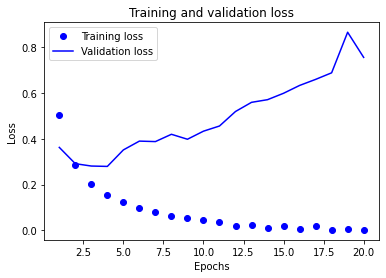

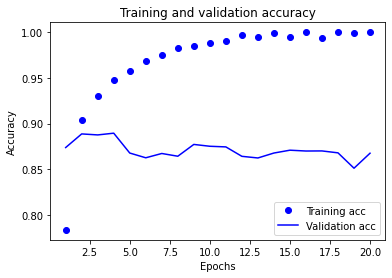

In [20]:
import matplotlib.pyplot as plt
loss_value_2a = history_dict_2a["loss"]
val_loss_value_2a = history_dict_2a["val_loss"]
epochs = range(1, len(loss_value_2a) + 1)
plt.plot(epochs, loss_value_2a, "bo", label="Training loss")
plt.plot(epochs, val_loss_value_2a, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()
plt.clf()
acc = history_dict_2a["accuracy"]
val_acc = history_dict_2a["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [23]:
model_2a.fit(x_train, y_train, epochs=4, batch_size=512)
results_2a = model_2a.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 1s 17ms/step - loss: 0.2199 - accuracy: 0.9449
Epoch 2/4
49/49 [==============================] - 1s 17ms/step - loss: 0.1237 - accuracy: 0.9630
Epoch 3/4
49/49 [==============================] - 1s 17ms/step - loss: 0.0914 - accuracy: 0.9720
Epoch 4/4
782/782 [==============================] - 1s 1ms/step - loss: 0.5121 - accuracy: 0.8604


In [24]:
results_2a

[0.5120534896850586, 0.8604400157928467]

**Defining and Compiling the Model with 64 layers**

In [27]:
model_2b = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model_2b.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_2b = model_2b.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))
history_dict_2b = history_2b.history
history_dict_2b.keys()

Epoch 1/20
30/30 [==============================] - 2s 46ms/step - loss: 0.4868 - accuracy: 0.7649 - val_loss: 0.3199 - val_accuracy: 0.8816
Epoch 2/20
30/30 [==============================] - 1s 34ms/step - loss: 0.2586 - accuracy: 0.9051 - val_loss: 0.2912 - val_accuracy: 0.8823
Epoch 3/20
30/30 [==============================] - 1s 35ms/step - loss: 0.1916 - accuracy: 0.9305 - val_loss: 0.2734 - val_accuracy: 0.8901
Epoch 4/20
30/30 [==============================] - 1s 35ms/step - loss: 0.1431 - accuracy: 0.9514 - val_loss: 0.2972 - val_accuracy: 0.8842
Epoch 5/20
30/30 [==============================] - 1s 34ms/step - loss: 0.1205 - accuracy: 0.9565 - val_loss: 0.3123 - val_accuracy: 0.8862
Epoch 6/20
30/30 [==============================] - 1s 34ms/step - loss: 0.0766 - accuracy: 0.9759 - val_loss: 0.3465 - val_accuracy: 0.8844
Epoch 7/20
30/30 [==============================] - 1s 35ms/step - loss: 0.0582 - accuracy: 0.9836 - val_loss: 0.3842 - val_accuracy: 0.8799
Epoch 8/20
30

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

**Plotting Accuracy and Loss of the Model**

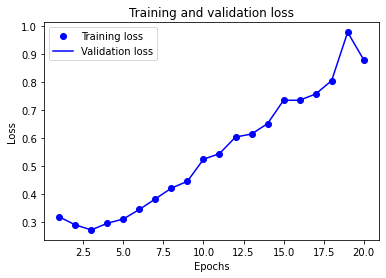

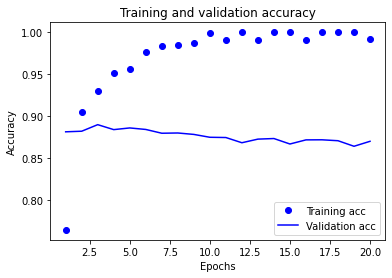

In [28]:
import matplotlib.pyplot as plt
loss_value_2b = history_dict_2b["loss"]
val_loss_value_2b = history_dict_2b["val_loss"]
epochs = range(1, len(loss_value_2b) + 1)
plt.plot(epochs, val_loss_value_2b, "bo", label="Training loss")
plt.plot(epochs, val_loss_value_2b, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()
plt.clf()
acc = history_dict_2b["accuracy"]
val_acc = history_dict_2b["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [29]:
model_2b.fit(x_train, y_train, epochs=4, batch_size=512)
results_2b = model_2b.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 1s 28ms/step - loss: 0.2149 - accuracy: 0.9447
Epoch 2/4
49/49 [==============================] - 1s 28ms/step - loss: 0.1005 - accuracy: 0.9678
Epoch 3/4
49/49 [==============================] - 1s 27ms/step - loss: 0.0610 - accuracy: 0.9810
Epoch 4/4
782/782 [==============================] - 1s 2ms/step - loss: 0.6295 - accuracy: 0.8622


In [30]:
results_2b

[0.6294626593589783, 0.8622400164604187]

**Defining and Compiling the Model with 128 layers**

In [31]:
model_2c = keras.Sequential([
    layers.Dense(128, activation="relu"),
    layers.Dense(128, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model_2c.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_2c = model_2c.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))
history_dict_2c = history_2c.history
history_dict_2c.keys()

Epoch 1/20
30/30 [==============================] - 2s 63ms/step - loss: 0.4916 - accuracy: 0.7677 - val_loss: 0.3152 - val_accuracy: 0.8778
Epoch 2/20
30/30 [==============================] - 2s 57ms/step - loss: 0.2484 - accuracy: 0.9056 - val_loss: 0.3505 - val_accuracy: 0.8534
Epoch 3/20
30/30 [==============================] - 2s 57ms/step - loss: 0.1801 - accuracy: 0.9311 - val_loss: 0.4312 - val_accuracy: 0.8375
Epoch 4/20
30/30 [==============================] - 2s 55ms/step - loss: 0.1156 - accuracy: 0.9584 - val_loss: 0.3326 - val_accuracy: 0.8827
Epoch 5/20
30/30 [==============================] - 2s 54ms/step - loss: 0.0963 - accuracy: 0.9692 - val_loss: 0.3551 - val_accuracy: 0.8785
Epoch 6/20
30/30 [==============================] - 2s 56ms/step - loss: 0.0767 - accuracy: 0.9766 - val_loss: 0.3638 - val_accuracy: 0.8813
Epoch 7/20
30/30 [==============================] - 2s 55ms/step - loss: 0.0152 - accuracy: 0.9977 - val_loss: 0.4411 - val_accuracy: 0.8801
Epoch 8/20
30

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

**Plotting Accuracy and Loss of the Model**

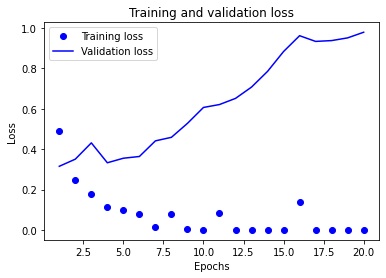

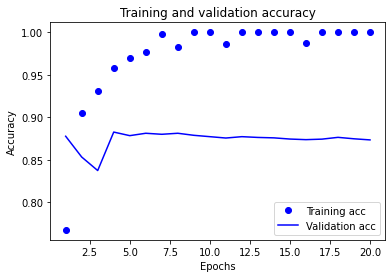

In [32]:
import matplotlib.pyplot as plt
loss_value_2c = history_dict_2c["loss"]
val_loss_value_2c = history_dict_2c["val_loss"]
epochs = range(1, len(loss_value_2c) + 1)
plt.plot(epochs, loss_value_2c, "bo", label="Training loss")
plt.plot(epochs, val_loss_value_2c, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()
plt.clf()
acc = history_dict_2c["accuracy"]
val_acc = history_dict_2c["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [33]:
model_2c.fit(x_train, y_train, epochs=4, batch_size=512)
results_2c = model_2c.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 2s 43ms/step - loss: 0.2547 - accuracy: 0.9427
Epoch 2/4
49/49 [==============================] - 2s 43ms/step - loss: 0.0776 - accuracy: 0.9750
Epoch 3/4
49/49 [==============================] - 2s 43ms/step - loss: 0.0394 - accuracy: 0.9872
Epoch 4/4
782/782 [==============================] - 2s 3ms/step - loss: 0.6554 - accuracy: 0.8685


In [34]:
results_2c

[0.6554473638534546, 0.8685200214385986]

### 3. Using MSE Loss Function instead of binary_crossentropy

**Defining and Compiling the Model**

In [35]:
model_MSE = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model_MSE.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])
history_model_MSE = model_MSE.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))
history_dict_MSE = history_model_MSE.history
history_dict_MSE.keys()

Epoch 1/20
30/30 [==============================] - 1s 25ms/step - loss: 0.1707 - accuracy: 0.7909 - val_loss: 0.1430 - val_accuracy: 0.8127
Epoch 2/20
30/30 [==============================] - 1s 18ms/step - loss: 0.0923 - accuracy: 0.9037 - val_loss: 0.0956 - val_accuracy: 0.8815
Epoch 3/20
30/30 [==============================] - 1s 18ms/step - loss: 0.0657 - accuracy: 0.9316 - val_loss: 0.0852 - val_accuracy: 0.8912
Epoch 4/20
30/30 [==============================] - 1s 19ms/step - loss: 0.0514 - accuracy: 0.9434 - val_loss: 0.0862 - val_accuracy: 0.8842
Epoch 5/20
30/30 [==============================] - 1s 18ms/step - loss: 0.0406 - accuracy: 0.9587 - val_loss: 0.0830 - val_accuracy: 0.8880
Epoch 6/20
30/30 [==============================] - 1s 18ms/step - loss: 0.0340 - accuracy: 0.9663 - val_loss: 0.0887 - val_accuracy: 0.8802
Epoch 7/20
30/30 [==============================] - 1s 19ms/step - loss: 0.0292 - accuracy: 0.9721 - val_loss: 0.0859 - val_accuracy: 0.8856
Epoch 8/20
30

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

**Plotting Accuracy and Loss of the Model**

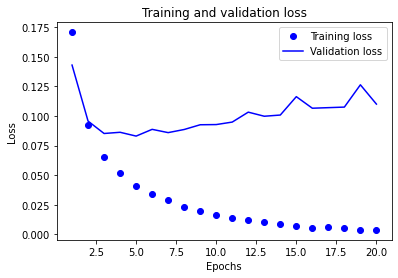

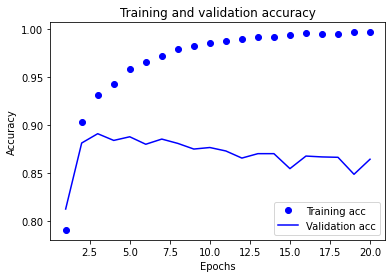

In [36]:
import matplotlib.pyplot as plt
loss_value_MSE = history_dict_MSE["loss"]
val_loss_value_MSE = history_dict_MSE["val_loss"]
epochs = range(1, len(loss_value_MSE) + 1)
plt.plot(epochs, loss_value_MSE, "bo", label="Training loss")
plt.plot(epochs, val_loss_value_MSE, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()
plt.clf()
acc = history_dict_MSE["accuracy"]
val_acc = history_dict_MSE["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [37]:
model_MSE.fit(x_train, y_train, epochs=4, batch_size=512)
results_MSE = model_MSE.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 1s 14ms/step - loss: 0.0457 - accuracy: 0.9454
Epoch 2/4
49/49 [==============================] - 1s 14ms/step - loss: 0.0336 - accuracy: 0.9619
Epoch 3/4
49/49 [==============================] - 1s 14ms/step - loss: 0.0288 - accuracy: 0.9684
Epoch 4/4
782/782 [==============================] - 1s 1ms/step - loss: 0.1174 - accuracy: 0.8571


In [38]:
results_MSE

[0.11740012466907501, 0.8570799827575684]

### 4. Using the Tanh Activation Function instead of Relu

**Defining and Compiling the Model**

In [39]:
model_tanh = keras.Sequential([
    layers.Dense(32, activation="tanh"),
    layers.Dense(32, activation="tanh"),
    layers.Dense(1, activation="sigmoid")
])
model_tanh.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_model_tanh = model_tanh.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))
history_dict_tanh = history_model_tanh.history
history_dict_tanh.keys()

Epoch 1/20
30/30 [==============================] - 3s 30ms/step - loss: 0.4662 - accuracy: 0.7888 - val_loss: 0.3275 - val_accuracy: 0.8735
Epoch 2/20
30/30 [==============================] - 1s 24ms/step - loss: 0.2424 - accuracy: 0.9109 - val_loss: 0.2798 - val_accuracy: 0.8889
Epoch 3/20
30/30 [==============================] - 1s 24ms/step - loss: 0.1667 - accuracy: 0.9389 - val_loss: 0.2882 - val_accuracy: 0.8857
Epoch 4/20
30/30 [==============================] - 1s 24ms/step - loss: 0.1286 - accuracy: 0.9527 - val_loss: 0.3158 - val_accuracy: 0.8836
Epoch 5/20
30/30 [==============================] - 1s 24ms/step - loss: 0.1023 - accuracy: 0.9631 - val_loss: 0.3848 - val_accuracy: 0.8694
Epoch 6/20
30/30 [==============================] - 1s 23ms/step - loss: 0.0817 - accuracy: 0.9701 - val_loss: 0.4045 - val_accuracy: 0.8710
Epoch 7/20
30/30 [==============================] - 1s 24ms/step - loss: 0.0710 - accuracy: 0.9759 - val_loss: 0.4617 - val_accuracy: 0.8665
Epoch 8/20
30

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

**Plotting Accuracy and Loss of the Model**

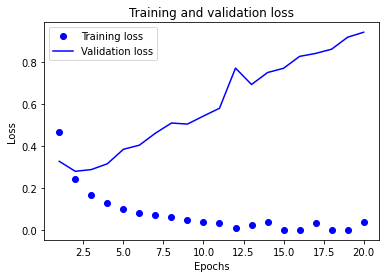

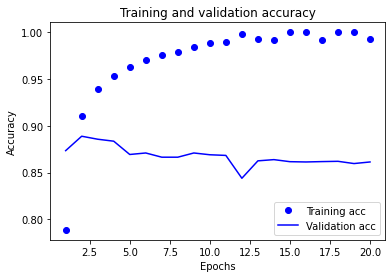

In [40]:
import matplotlib.pyplot as plt
loss_value_tanh = history_dict_tanh["loss"]
val_loss_value_tanh = history_dict_tanh["val_loss"]
epochs = range(1, len(loss_value_tanh) + 1)
plt.plot(epochs, loss_value_tanh, "bo", label="Training loss")
plt.plot(epochs, val_loss_value_tanh, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()
plt.clf()
acc = history_dict_tanh["accuracy"]
val_acc = history_dict_tanh["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [41]:
model_tanh.fit(x_train, y_train, epochs=4, batch_size=512)
results_tanh = model_tanh.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 1s 18ms/step - loss: 0.3280 - accuracy: 0.9425
Epoch 2/4
49/49 [==============================] - 1s 18ms/step - loss: 0.1558 - accuracy: 0.9609
Epoch 3/4
49/49 [==============================] - 1s 17ms/step - loss: 0.1161 - accuracy: 0.9652
Epoch 4/4
782/782 [==============================] - 1s 1ms/step - loss: 0.5058 - accuracy: 0.8504


In [42]:
results_tanh

[0.5057600140571594, 0.8504400253295898]

### 5. Using Dropout and Hypertuning Techniques on the Model to Perform Better on Validation

**Defining and Compiling the Model with Dropout Technique**

In [43]:
from tensorflow.keras import regularizers
model_Dropout = keras.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(32, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
model_Dropout.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_model_Dropout = model_Dropout.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))
history_dict_Dropout = history_model_Dropout.history
history_dict_Dropout.keys()

Epoch 1/20
30/30 [==============================] - 1s 28ms/step - loss: 0.5942 - accuracy: 0.6800 - val_loss: 0.4375 - val_accuracy: 0.8596
Epoch 2/20
30/30 [==============================] - 1s 23ms/step - loss: 0.4223 - accuracy: 0.8336 - val_loss: 0.3344 - val_accuracy: 0.8790
Epoch 3/20
30/30 [==============================] - 1s 23ms/step - loss: 0.3219 - accuracy: 0.8855 - val_loss: 0.2893 - val_accuracy: 0.8871
Epoch 4/20
30/30 [==============================] - 1s 23ms/step - loss: 0.2564 - accuracy: 0.9111 - val_loss: 0.2899 - val_accuracy: 0.8887
Epoch 5/20
30/30 [==============================] - 1s 23ms/step - loss: 0.2138 - accuracy: 0.9285 - val_loss: 0.2859 - val_accuracy: 0.8849
Epoch 6/20
30/30 [==============================] - 1s 23ms/step - loss: 0.1873 - accuracy: 0.9395 - val_loss: 0.2891 - val_accuracy: 0.8917
Epoch 7/20
30/30 [==============================] - 1s 23ms/step - loss: 0.1518 - accuracy: 0.9522 - val_loss: 0.3058 - val_accuracy: 0.8894
Epoch 8/20
30

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

**Plotting Accuracy and Loss of the Model**

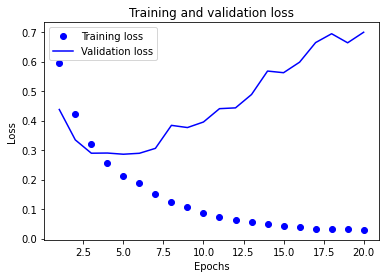

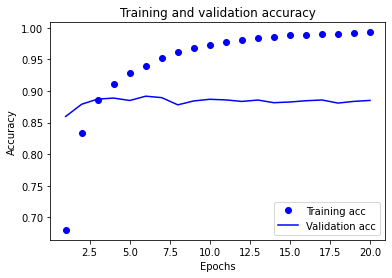

In [44]:
import matplotlib.pyplot as plt
loss_value_drop = history_dict_Dropout["loss"]
val_loss_value_drop = history_dict_Dropout["val_loss"]
epochs = range(1, len(loss_value_drop) + 1)
plt.plot(epochs, loss_value_drop, "bo", label="Training loss")
plt.plot(epochs, val_loss_value_drop, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()
plt.clf()
acc = history_dict_Dropout["accuracy"]
val_acc = history_dict_Dropout["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [45]:
model_Dropout.fit(x_train, y_train, epochs=4, batch_size=512)
results_Dropout = model_Dropout.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 1s 18ms/step - loss: 0.2565 - accuracy: 0.9352
Epoch 2/4
49/49 [==============================] - 1s 18ms/step - loss: 0.1776 - accuracy: 0.9492
Epoch 3/4
49/49 [==============================] - 1s 18ms/step - loss: 0.1467 - accuracy: 0.9576
Epoch 4/4
782/782 [==============================] - 1s 1ms/step - loss: 0.4733 - accuracy: 0.8689


In [46]:
results_Dropout

[0.4732835590839386, 0.8688799738883972]

**Defining and Compiling the Model with Hypertuning Technique**

In [47]:
from tensorflow.keras import regularizers
model_hyper = keras.Sequential([
    layers.Dense(64, activation="relu",kernel_regularizer=regularizers.l2(0.002)),
    layers.Dropout(0.7),    
    layers.Dense(64, activation="relu",kernel_regularizer=regularizers.l2(0.002)),
    layers.Dropout(0.7),
    layers.Dense(32, activation="relu",kernel_regularizer=regularizers.l2(0.002)),
    layers.Dropout(0.7),
    layers.Dense(1, activation="sigmoid")
])
model_hyper.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])
history_model_hyper = model_hyper.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))
history_dict_hyper = history_model_hyper.history
history_dict_hyper.keys()

Epoch 1/20
30/30 [==============================] - 2s 41ms/step - loss: 0.5119 - accuracy: 0.5353 - val_loss: 0.4222 - val_accuracy: 0.7682
Epoch 2/20
30/30 [==============================] - 1s 37ms/step - loss: 0.3725 - accuracy: 0.6683 - val_loss: 0.3146 - val_accuracy: 0.8249
Epoch 3/20
30/30 [==============================] - 1s 36ms/step - loss: 0.2924 - accuracy: 0.7749 - val_loss: 0.2472 - val_accuracy: 0.8622
Epoch 4/20
30/30 [==============================] - 1s 35ms/step - loss: 0.2395 - accuracy: 0.8236 - val_loss: 0.2045 - val_accuracy: 0.8677
Epoch 5/20
30/30 [==============================] - 1s 36ms/step - loss: 0.2050 - accuracy: 0.8463 - val_loss: 0.1722 - val_accuracy: 0.8762
Epoch 6/20
30/30 [==============================] - 1s 35ms/step - loss: 0.1779 - accuracy: 0.8570 - val_loss: 0.1577 - val_accuracy: 0.8724
Epoch 7/20
30/30 [==============================] - 1s 36ms/step - loss: 0.1619 - accuracy: 0.8692 - val_loss: 0.1424 - val_accuracy: 0.8754
Epoch 8/20
30

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

**Plotting Accuracy and Loss of the Model**

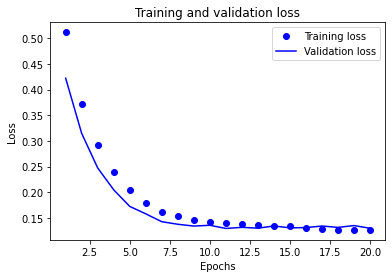

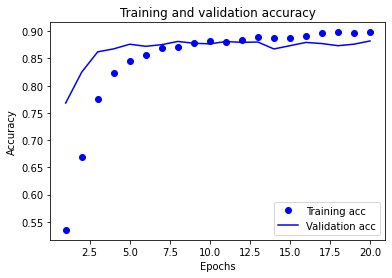

In [48]:
import matplotlib.pyplot as plt
loss_value_hyper = history_dict_hyper["loss"]
val_loss_value_hyper = history_dict_hyper["val_loss"]
epochs = range(1, len(loss_value_hyper) + 1)
plt.plot(epochs, loss_value_hyper, "bo", label="Training loss")
plt.plot(epochs, val_loss_value_hyper, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()
plt.clf()
acc = history_dict_hyper["accuracy"]
val_acc = history_dict_hyper["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [49]:
model_hyper.fit(x_train, y_train, epochs=4, batch_size=512)
results_hyper = model_hyper.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 1s 28ms/step - loss: 0.1392 - accuracy: 0.8758
Epoch 2/4
49/49 [==============================] - 1s 27ms/step - loss: 0.1345 - accuracy: 0.8848
Epoch 3/4
49/49 [==============================] - 1s 28ms/step - loss: 0.1341 - accuracy: 0.8836
Epoch 4/4
782/782 [==============================] - 2s 2ms/step - loss: 0.1307 - accuracy: 0.8755


In [50]:
results_hyper

[0.13067735731601715, 0.8755199909210205]

### Summarizing the Results of Various Models Across Accuracy and Loss

In [52]:
import numpy
all_Loss= numpy.array([results_Dropout[0],results_hyper[0],results_MSE[0],results_tanh[0]])*100
all_Loss
all_Accuracy= numpy.array([results_Dropout[1],results_hyper[1],results_MSE[1],results_tanh[1]])*100
all_Accuracy
Labels=['Model_Dropout','Model_hyper','Model_MSE','model_tanh']

plt.clf()

<Figure size 432x288 with 0 Axes>

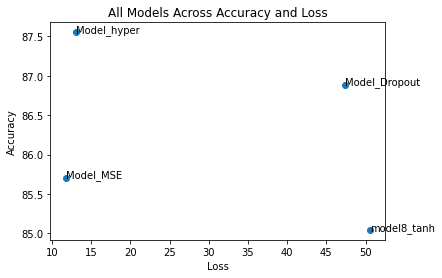

In [53]:
fig, ax = plt.subplots()
ax.scatter(all_Loss,all_Accuracy)
for i, txt in enumerate(Labels):
    ax.annotate(txt, (all_Loss[i],all_Accuracy[i] ))
plt.title("All Models Across Accuracy and Loss")
plt.ylabel("Accuracy")
plt.xlabel("Loss")

plt.show()

The model with Hypertuning technique has the highest accuracy with least loss among all the above models. This model was compiled using regularizers and dropout with MSE loss function. The dropout was set at 0.7 and dense layers of 64,64 and 32 were chosen for the model. The MSE loss function, used both in MSE model and hyper model has the least loss compared to other models. While increasing the number of units from 16, 32, 64, 128, we saw that change in the accuracy is minimum yet the loss function decreases. Tanh activation given the least accuracy compared to other models. We can also observe that the dropout technique does not lower the accuracy value very much.